## Leading Score Case Study

With 37 predictor variables, we need to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

### 1.Reading and understanding data

In [188]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [189]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
# Reading Leads data set
leads = pd.read_csv("D:/Sushma/Data Science/Machine Learning/Lead Scoring Case Study/Lead Scoring Assignment/Leads.csv")


In [191]:
#Checking the head of leads data set
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [192]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [193]:
#Checking the shape of leads data set
leads.shape

(9240, 37)

In [194]:
#Checking the statistics of numeric features in leads data set
leads.describe([.05,.25,.5,.75,.95])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000,12.000000,14.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 2. Data Cleaning

In [195]:
#Deleting duplicate records from leads data set
leads.drop_duplicates(inplace=True)

In [196]:
#Replacing 'Select' with null values
leads = leads.replace('Select', np.nan)

In [197]:
# Checking for null values in the columns
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [198]:
# Checking the column-wise null percentages here

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [199]:
#Dropping the columns which have more than or equal to 30% of null values
thresh = len(leads) * .7
leads.dropna(thresh = thresh, axis = 1, inplace = True)

In [200]:
# Checking the column-wise null percentages here
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [201]:
#Dropping the columns which have only one value as it will not be useful for analysis or model building
leads = leads.drop('Magazine',axis=1)
leads = leads.drop('Receive More Updates About Our Courses',axis=1)
leads = leads.drop('Update me on Supply Chain Content',axis=1)
leads = leads.drop('Get updates on DM Content',axis=1)
leads = leads.drop('I agree to pay the amount through cheque',axis=1)

In [202]:
# Checking the column-wise null percentages
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [203]:
# Checking the column-wise null percentages
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [204]:
#Checking count of records for each value in the column
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [205]:
#Checking count of records for each value in the column
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
testone                 1
NC_EDM                  1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
blog                    1
Name: Lead Source, dtype: int64

In [206]:
#Checking count of records for each value in the column
leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [207]:
#Checking count of records for each value in the column
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [208]:
#Checking count of records for each value in the column
leads['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [209]:
#Checking count of records for each value in the column
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [210]:
#Checking count of records for each value in the column
leads['Total Time Spent on Website'].value_counts()

0       2193
60        19
127       18
75        18
74        18
157       17
234       17
32        17
87        17
62        17
69        16
213       16
96        16
176       15
68        15
94        15
71        15
247       15
129       15
33        15
12        15
31        14
100       14
78        14
49        14
151       14
139       14
14        14
63        14
2         14
        ... 
659        1
611        1
1675       1
603        1
587        1
571        1
523        1
483        1
435        1
2226       1
915        1
923        1
939        1
971        1
1667       1
1555       1
1547       1
1515       1
1443       1
1355       1
1339       1
1307       1
1299       1
1267       1
1251       1
1235       1
1091       1
1043       1
1035       1
1915       1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

In [211]:
#Checking count of records for each value in the column
leads['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
         ... 
1.19        1
3.91        1
55.00       1
3.17        1
2.57        1
12.33       1
2.08        1
3.38        1
2.90        1
1.48        1
2.38        1
14.50       1
11.50       1
8.50        1
1.45        1
1.31        1
3.43        1
3.83        1
1.54        1
2.86        1
1.64        1
3.29        1
8.33        1
6.67        1
1.21        1
1.27        1
8.21        1
2.14        1
2.63        1
2.45        1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [212]:
#Checking count of records for each value in the column
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [213]:
#Checking count of records for each value in the column
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Germany                    4
Nigeria                    4
Kuwait                     4
Canada                     4
Sweden                     3
Asia/Pacific Region        2
China                      2
Bangladesh                 2
Philippines                2
Italy                      2
Netherlands                2
Ghana                      2
Uganda                     2
Belgium                    2
Malaysia                   1
Kenya                      1
Tanzania                   1
Liberia                    1
Switzerland                1
Sri Lanka                  1
Russia        

In [214]:
#Checking the percentage of null values and India in Country column
round(100*(len((leads[leads['Country'] == 'India'])|(leads[leads['Country'].isnull()==True]))/len(leads.index)),2)

96.89

In [215]:
#We cannot find much variance in the values,as more than 70% of the values are 'India' and 26% of the values are null.
#So,dropping the 'Country' column
leads = leads.drop('Country',axis=1) 

In [216]:
#Checking count of records for each value in the column
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [217]:
#More than 29% of values are null.
#So,dropping the 'What is your current occupation' column
leads = leads.drop('What is your current occupation',axis=1) 

In [218]:
#Checking count of records for each value in the column
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [219]:
#Checking the percentage of null values and 'Better Career Prospects' in 'What matters most to you in choosing a course' column
round(100*(len((leads[leads['What matters most to you in choosing a course'] == 'Better Career Prospects'])|(leads[leads['What matters most to you in choosing a course'].isnull()==True]))/len(leads.index)),2)

99.97

In [220]:
#We cannot find much variance in the values,as more than 70% of the values are 'Better Career Prospects' and around 29% of values are null.
#So,dropping the 'What matters most to you in choosing a course' column
leads = leads.drop('What matters most to you in choosing a course',axis=1) 

In [221]:
#Checking count of records for each value in the column
leads['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [222]:
#Checking count of records for each value in the column
leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [223]:
#Checking count of records for each value in the column
leads['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [224]:
#Checking count of records for each value in the column
leads['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [225]:
#Checking count of records for each value in the column
leads['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [226]:
#Checking count of records for each value in the column
leads['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [227]:
#Checking count of records for each value in the column
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Approached upfront                 1
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [228]:
# Checking the column-wise null percentages
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [229]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 19 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Do Not Email                              9240 non-null object
Do Not Call                               9240 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Search                                    9240 non-null object
Newspaper Article                         9240 non-null object
X Education Forums                        9240 non-null object
Newspaper   

In [230]:
#Deleting the rows which have null values in TotalVisits and Lead Source columns
leads.dropna(axis=0, subset=['TotalVisits'],inplace=True)

In [231]:
# Checking the column-wise null percentages
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.32
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [232]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 19 columns):
Prospect ID                               9103 non-null object
Lead Number                               9103 non-null int64
Lead Origin                               9103 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9103 non-null object
Do Not Call                               9103 non-null object
Converted                                 9103 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9103 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9103 non-null object
Search                                    9103 non-null object
Newspaper Article                         9103 non-null object
X Education Forums                        9103 non-null object
Newspaper   

In [233]:
#Dropping the records with null values in 'Lead Source' column
leads = leads.dropna(axis=0, subset=['Lead Source'])

In [234]:
# Checking the column-wise null percentages
round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [235]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
Prospect ID                               9074 non-null object
Lead Number                               9074 non-null int64
Lead Origin                               9074 non-null object
Lead Source                               9074 non-null object
Do Not Email                              9074 non-null object
Do Not Call                               9074 non-null object
Converted                                 9074 non-null int64
TotalVisits                               9074 non-null float64
Total Time Spent on Website               9074 non-null int64
Page Views Per Visit                      9074 non-null float64
Last Activity                             9074 non-null object
Search                                    9074 non-null object
Newspaper Article                         9074 non-null object
X Education Forums                        9074 non-null object
Newspaper   

In [236]:
# Checking the column-wise null percentages here

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## 3. Visualising the data

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

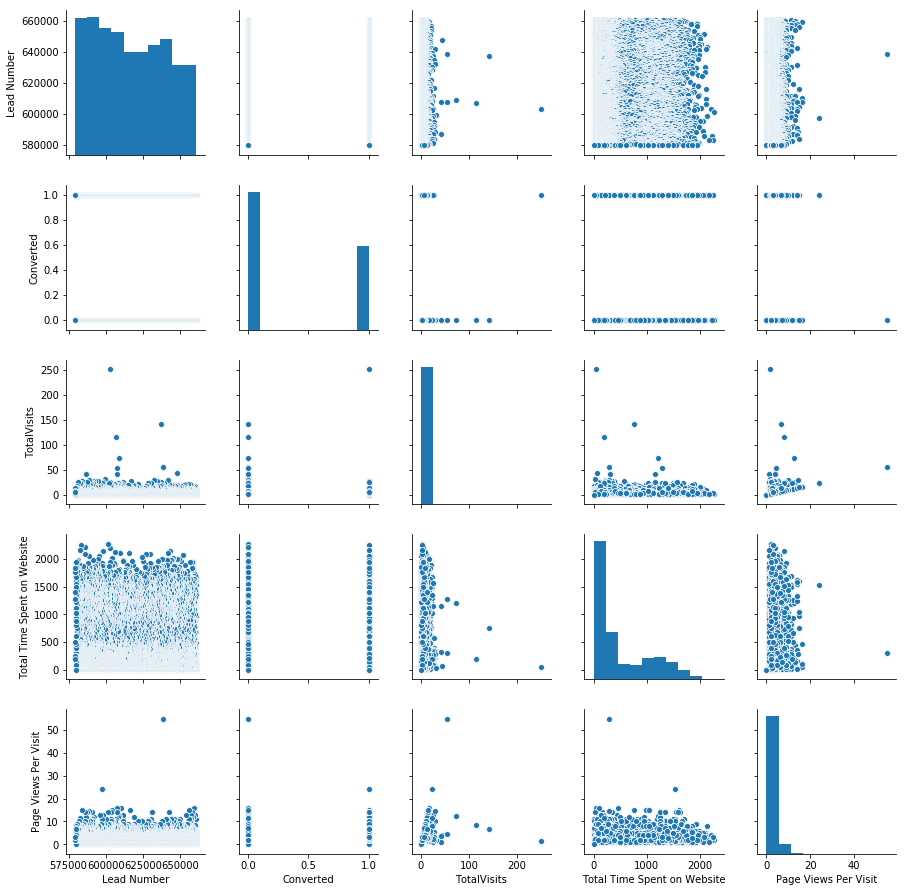

In [238]:
#Making pair plots of all the numeric variables

sns.pairplot(leads)
plt.show()

In [239]:
#Checking the statistics of the numeric features in leads data set
leads.describe([.05,.25,.5,.75,.95])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
5%,582840.800000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


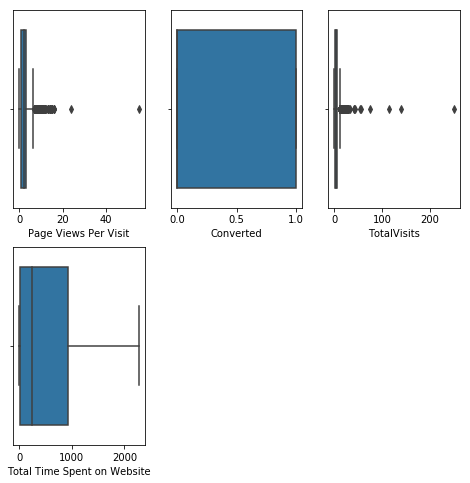

In [240]:
#Plotting box plots for the numeric features to check for the outliers
plt.figure(figsize=(8, 8))
plt.subplot(2,3,1)
sns.boxplot(x=leads['Page Views Per Visit'])
plt.subplot(2,3,2)
sns.boxplot(x=leads['Converted'])
plt.subplot(2,3,3)
sns.boxplot(x=leads['TotalVisits'])
plt.subplot(2,3,4)
sns.boxplot(x=leads['Total Time Spent on Website'])

plt.show()

In [241]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

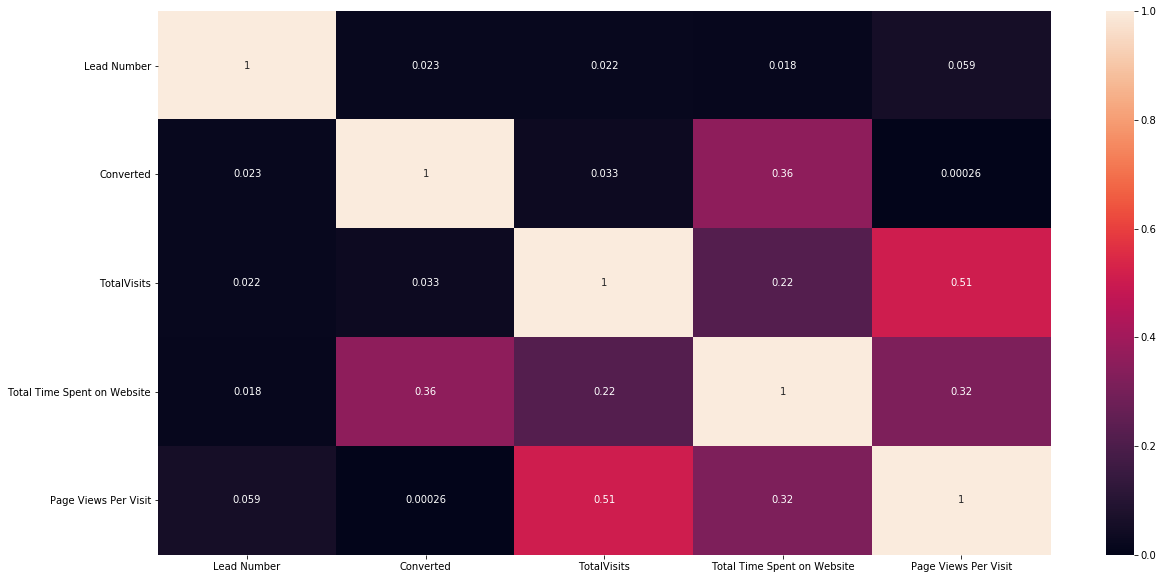

In [242]:
# Checking the correlations between variables in leads data set
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

## 4. Data Preparation

In [243]:
# Converting Yes to 1 and No to 0
leads['Do Not Email'] = leads['Search'].map({'Yes': 1, 'No': 0})
leads['Do Not Call'] = leads['Search'].map({'Yes': 1, 'No': 0})
leads['Search'] = leads['Search'].map({'Yes': 1, 'No': 0})
leads['Newspaper Article'] = leads['Newspaper Article'].map({'Yes': 1, 'No': 0})
leads['X Education Forums'] = leads['X Education Forums'].map({'Yes': 1, 'No': 0})
leads['Newspaper'] = leads['Newspaper'].map({'Yes': 1, 'No': 0})
leads['Digital Advertisement'] = leads['Digital Advertisement'].map({'Yes': 1, 'No': 0})
leads['Through Recommendations'] = leads['Through Recommendations'].map({'Yes': 1, 'No': 0})
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})

### Creating dummy variables for categorical variables

In [244]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
lead_origin = pd.get_dummies(leads['Lead Origin'],prefix='Lead Origin',drop_first=True)
lead_source = pd.get_dummies(leads['Lead Source'],prefix='Lead Source',drop_first=True)
last_acticvity = pd.get_dummies(leads['Last Activity'],prefix='Last Activity',drop_first=True)
last_notable_acticvity = pd.get_dummies(leads['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)


In [245]:
#Concatenating the dummy varaibles to the leads data set
leads = pd.concat([leads,lead_origin,lead_source,last_acticvity,last_notable_acticvity],axis=1)

In [246]:
#Checking the head of leads data set
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


In [247]:
# Dropping the variables for which we have created dummies
leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity'], 1)

In [248]:
# Dropping the Lead Number as they will not be useful for analysis
leads = leads.drop(['Lead Number'], 1)

In [249]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 68 columns):
Prospect ID                                           9074 non-null object
Do Not Email                                          9074 non-null int64
Do Not Call                                           9074 non-null int64
Converted                                             9074 non-null int64
TotalVisits                                           9074 non-null float64
Total Time Spent on Website                           9074 non-null int64
Page Views Per Visit                                  9074 non-null float64
Search                                                9074 non-null int64
Newspaper Article                                     9074 non-null int64
X Education Forums                                    9074 non-null int64
Newspaper                                             9074 non-null int64
Digital Advertisement                                 9074 non-null int64


## 5.Test - Train Split

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
# Removing the outliers
Q1 = leads['TotalVisits'].quantile(0.00)
Q3 = leads['TotalVisits'].quantile(0.95)
leads_no_outliers = leads.loc[(leads['TotalVisits'] <=Q3)]

In [252]:
#Checking the statistics of numeric features after eliminating the outliers
leads_no_outliers.describe([.05,.25,.5,.75,.95])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000,8721.0,8721.000000,...,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000,8721.000000
mean,0.000917,0.000917,0.374957,2.916294,473.146887,2.255668,0.000917,0.000115,0.0,0.000115,...,0.000115,0.001261,0.364522,0.020067,0.028208,0.000115,0.239193,0.003669,0.005045,0.000115
std,0.030275,0.030275,0.484140,2.468306,542.265343,1.922397,0.030275,0.010708,0.0,0.010708,...,0.010708,0.035495,0.481324,0.140236,0.165575,0.010708,0.426615,0.060467,0.070855,0.010708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,236.000000,2.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,4.000000,899.000000,3.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95%,0.000000,0.000000,1.000000,8.000000,1551.000000,6.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,10.000000,2272.000000,10.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


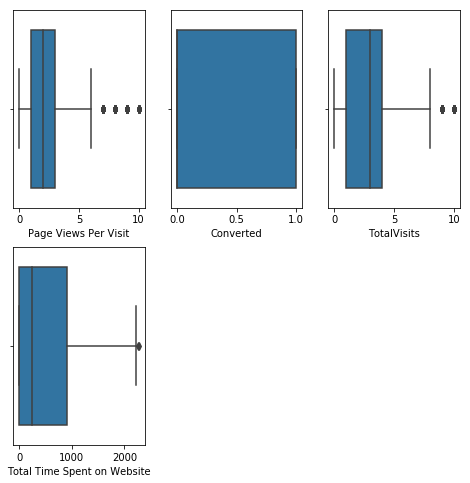

In [253]:
#Checking the box plots of the numeric features after eliminating the outliers
plt.figure(figsize=(8, 8))
plt.subplot(2,3,1)
sns.boxplot(x=leads_no_outliers['Page Views Per Visit'])
plt.subplot(2,3,2)
sns.boxplot(x=leads_no_outliers['Converted'])
plt.subplot(2,3,3)
sns.boxplot(x=leads_no_outliers['TotalVisits'])
plt.subplot(2,3,4)
sns.boxplot(x=leads_no_outliers['Total Time Spent on Website'])

plt.show()

In [254]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

#Splitting the leads data set into train and test sets in the ratio of 70:30
leads_train, leads_test = train_test_split(leads_no_outliers, train_size = 0.7, test_size = 0.3, random_state = 100)

## 6.Feature scaling

In [255]:
from sklearn.preprocessing import StandardScaler

In [256]:
#creating the standard scaler
scaler = StandardScaler()

In [257]:
# Applying standard scaler to all the numeric columns of leads data set
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
leads_train[num_vars] = scaler.fit_transform(leads_train[num_vars])

In [258]:
#Checking the head of leads_train data set
leads_train.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7220,260562de-2a20-4054-84d8-9078502bdf07,0,0,1,0.436186,2.091938,0.918347,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3383,8cb3a5c7-1bde-40da-b915-55528ffcaccf,0,0,0,0.028331,0.230687,0.391804,0,0,0,...,0,0,0,0,0,0,1,0,0,0
770,f445613b-089f-4715-9d4d-def14fb26bdc,0,0,0,0.436186,-0.244329,0.918347,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5785,112e2574-5b64-4409-95e4-d7e084d64cdb,0,0,1,-1.195236,-0.876452,-1.187826,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5252,44888262-e19b-46eb-ad9e-7e9f73675662,0,0,1,1.251898,-0.464278,-0.134740,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [259]:
#Checking the Conversion Rate
conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conversion

37.85541106458012

## 7. Model Building


In [260]:
import statsmodels.api as sm

In [261]:
#Dividing leads_train data set into x and y sets for the model building.
y_train = leads_train['Converted']
X_train = leads_train.drop(['Converted','Prospect ID'], 1)

In [262]:
# Building the Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

#Checking the summary of Logistic regression model
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6046
Model Family:                Binomial   Df Model:                           57
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        20:21:47   Pearson chi2:                 7.20e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               3.749e+15    9.5e+07   3.94e+07      0.000    3.75e+15    3.75e+15
Do Not Email                                        3.325e+13   8.62e+06   3.86e+06      0.000    3.32e+13    3.32e+13
Do Not Call                                         3.325e+13   8.62e+06   3.86e+06      0.000    3.32e+13    3.32e+13
TotalVisits                                        -1.849e+14   1.55e+06  -1.19e+08      0.000   -1.85e+14   -1.85e+14
Total Time Spent on Website                         8.207e+14    9.9e+05   8.29e+08      0.000    8.21e+14    8.21e+14
Page Views Per Visit                                1.015e+14   1.56e+06   6.49e+07      0.000    1.01e+14    1.01e+14
Search                                              3.325e+13   8.62e+06   3.86e+06      0.000    3.32e+13    3.32e+13
Newspaper Article                                   2.611e+16   6.73e+07   3.88e+08      0.000    2.61e+16    2.61e+16
X Education Forums                                  -130.5448    6.9e-07  -1.89e+08      0.000    -130.545    -130.545
Newspaper                                             78.4408   5.91e-07   1.33e+08      0.000      78.441      78.441
Digital Advertisement                              -6.916e+14   3.89e+07  -1.78e+07      0.000   -6.92e+14   -6.92e+14
Through Recommendations                             2.812e+14   3.06e+07   9.18e+06      0.000    2.81e+14    2.81e+14
A free copy of Mastering The Interview              3.875e+13   2.72e+06   1.43e+07      0.000    3.87e+13    3.87e+13
Lead Origin_Landing Page Submission                -2.878e+13   2.75e+06  -1.05e+07      0.000   -2.88e+13   -2.88e+13
Lead Origin_Lead Add Form                           1.896e+15   4.76e+07   3.98e+07      0.000     1.9e+15     1.9e+15
Lead Origin_Lead Import                             5.043e+14   6.87e+07   7.34e+06      0.000    5.04e+14    5.04e+14
Lead Source_Direct Traffic                          5.237e+14   6.74e+07   7.77e+06      0.000    5.24e+14    5.24e+14
Lead Source_Facebook                               -3.509e+14   9.51e+07  -3.69e+06      0.000   -3.51e+14   -3.51e+14
Lead Source_Google                                  8.025e+14   6.73e+07   1.19e+07      0.000    8.02e+14    8.02e+14
Lead Source_Live Chat                               4.574e+15   6.72e+07   6.81e+07      0.000    4.57e+15    4.57e+15
Lead Source_NC_EDM                                  3.968e+14   9.52e+07   4.17e+06      0.000    3.97e+14    3.97e+14
Lead Source_Olark Chat                             -8.657e+13   6.72e+07  -1.29e+06      0.000   -8.66e+13   -8.66e+13
Lead Source_Organic Search                           6.19e+14   6.74e+07   9.19e+06      0.000    6.19e+14    6.19e+14
Lead Source_Pay per Click Ads                      -1.116e+16   9.51

## 8.Feature selection using RFE

In [263]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [264]:
from sklearn.feature_selection import RFE
# running RFE with 15 variables as output
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [265]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
       False, False, False,  True, False, False,  True,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False])

In [266]:
# List of variables with the rfe ranking and the rfesupport status
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 48),
 ('Do Not Call', False, 47),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Search', False, 46),
 ('Newspaper Article', False, 8),
 ('X Education Forums', False, 49),
 ('Newspaper', False, 52),
 ('Digital Advertisement', False, 35),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', False, 44),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 42),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', False, 33),
 ('Lead Source_Olark Chat', False, 15),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 34),
 ('Lead Source_Press_Release', False, 39),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 

In [267]:
# Storing the 15 variables selected by RFE in col variable
col = X_train.columns[rfe.support_]

In [268]:
#Displaying 15 variables selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Acti

In [269]:
#Building logistic regression model with 15 variables selected using RFE
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

#Displaying the summary of the logistic regression model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6088
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.7
Date:                Mon, 10 Jun 2019   Deviance:                       5463.4
Time:                        20:21:50   Pearson chi2:                 6.21e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.1414      0.087     -1.617      0.106      -0.313       0.030
Total Time Spent on Website                1.0898      0.039     27.999      0.000       1.013       1.166
Through Recommendations                    2.6334      1.245      2.115      0.034       0.193       5.073
Lead Origin_Lead Add Form                  0.6075      0.973      0.624      0.532      -1.299       2.514
Lead Source_Direct Traffic                -1.4346      0.113    -12.748      0.000      -1.655      -1.214
Lead Source_Google                        -0.9970      0.107     -9.286      0.000      -1.207      -0.787
Lead Source_Organic Search                -1.2044      0.132     -9.127      0.000      -1.463      -0.946
Lead Source_Reference                      2.6470      0.999      2.649      0.008       0.689       4.606
Lead Source_Referral Sites                -1.1209      0.312     -3.591      0.000      -1.733      -0.509
Lead Source_Welingak Website               4.4685      1.401      3.190      0.001       1.723       7.214
Last Activity_Email Bounced               -2.9588      0.594     -4.984      0.000      -4.122      -1.795
Last Activity_Had a Phone Conversation     2.6145      0.801      3.263      0.001       1.044       4.185
Last Activity_Olark Chat Conversation     -1.5843      0.160     -9.885      0.000      -1.898      -1.270
Last Notable Activity_Email Bounced        2.2047      0.731      3.015      0.003       0.771       3.638
Last Notable Activity_SMS Sent             1.5980      0.078     20.574      0.000       1.446       1.750
Last Notable Activity_Unreachable          1.9739      0.510      3.872      0.000       0.975       2.973
==========================================================================================================
"""

In [270]:
# Checking the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [271]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,64.21
6,Lead Source_Reference,49.86
8,Lead Source_Welingak Website,15.34
9,Last Activity_Email Bounced,1.34
13,Last Notable Activity_SMS Sent,1.34
12,Last Notable Activity_Email Bounced,1.27
4,Lead Source_Google,1.18
0,Total Time Spent on Website,1.17
3,Lead Source_Direct Traffic,1.17
5,Lead Source_Organic Search,1.09


In [272]:
#Dropping the Lead Origin_Lead Add Form as it has high P and VIF values
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Total Time Spent on Website', 'Through Recommendations',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_SMS Sent',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [273]:
#Building the logistic regression model again
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()

#Displaying the summary of the logistic regression model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6089
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.9
Date:                Mon, 10 Jun 2019   Deviance:                       5463.8
Time:                        20:21:51   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.1369      0.087     -1.571      0.116      -0.308       0.034
Total Time Spent on Website                1.0902      0.039     28.016      0.000       1.014       1.166
Through Recommendations                    2.6338      1.245      2.116      0.034       0.194       5.074
Lead Source_Direct Traffic                -1.4395      0.112    -12.823      0.000      -1.659      -1.219
Lead Source_Google                        -1.0018      0.107     -9.355      0.000      -1.212      -0.792
Lead Source_Organic Search                -1.2092      0.132     -9.180      0.000      -1.467      -0.951
Lead Source_Reference                      3.2504      0.254     12.800      0.000       2.753       3.748
Lead Source_Referral Sites                -1.1254      0.312     -3.606      0.000      -1.737      -0.514
Lead Source_Welingak Website               5.0720      1.014      5.003      0.000       3.085       7.059
Last Activity_Email Bounced               -2.9595      0.594     -4.985      0.000      -4.123      -1.796
Last Activity_Had a Phone Conversation     2.6147      0.801      3.263      0.001       1.044       4.185
Last Activity_Olark Chat Conversation     -1.5871      0.160     -9.907      0.000      -1.901      -1.273
Last Notable Activity_Email Bounced        2.2046      0.731      3.015      0.003       0.771       3.638
Last Notable Activity_SMS Sent             1.5986      0.078     20.582      0.000       1.446       1.751
Last Notable Activity_Unreachable          1.9742      0.510      3.872      0.000       0.975       2.973
==========================================================================================================
"""

In [274]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_Email Bounced,1.34
12,Last Notable Activity_SMS Sent,1.34
11,Last Notable Activity_Email Bounced,1.27
3,Lead Source_Google,1.18
0,Total Time Spent on Website,1.17
2,Lead Source_Direct Traffic,1.17
4,Lead Source_Organic Search,1.09
5,Lead Source_Reference,1.08
10,Last Activity_Olark Chat Conversation,1.07
7,Lead Source_Welingak Website,1.03


In [275]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.66913665, 0.62338664, 0.54822376, 0.97716782, 0.38130556,
       0.12481935, 0.11908125, 0.52556338, 0.14323274, 0.98021765])

In [276]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,1,0.669137,7220
1,0,0.623387,3383
2,0,0.548224,770
3,1,0.977168,5785
4,1,0.381306,5252


## Making prediction on train data set

In [277]:
## Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted
0,1,0.669137,7220,1
1,0,0.623387,3383,1
2,0,0.548224,770,1
3,1,0.977168,5785,1
4,1,0.381306,5252,0


## 9.Checking the metrics

In [278]:
from sklearn import metrics

In [279]:
#Checking the metrics of the logistic regression model built`

In [280]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3328  481]
 [ 794 1501]]


In [281]:
# Predicted     not_converted    converted
# Actual
# not_converted        3328       481
# converted            794        1501  

In [282]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7911205766710354


In [283]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [284]:
#Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6540305010893246

In [285]:
#Checking the specificity
TN / float(TN+FP)

0.8737201365187713

In [286]:
# Checking the false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.12627986348122866


In [287]:
#Checking the positive predictive value 
print (TP / float(TP+FP))

0.7573158425832492


In [288]:
#Checking the Negative predictive value
print (TN / float(TN+ FN))

0.8073750606501698


## 10.Plotting ROC Curve

In [289]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [290]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

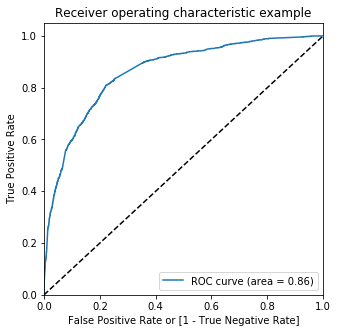

In [291]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## 11.Finding Optimal Cutoff Point

In [292]:
#Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.669137,7220,1,1,1,1,1,1,1,1,0,0,0
1,0,0.623387,3383,1,1,1,1,1,1,1,1,0,0,0
2,0,0.548224,770,1,1,1,1,1,1,1,0,0,0,0
3,1,0.977168,5785,1,1,1,1,1,1,1,1,1,1,1
4,1,0.381306,5252,0,1,1,1,1,0,0,0,0,0,0


In [293]:
#Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375983  1.000000  0.000000
0.1   0.1  0.546527  0.974292  0.288790
0.2   0.2  0.719856  0.908497  0.606196
0.3   0.3  0.783585  0.818736  0.762405
0.4   0.4  0.787025  0.738998  0.815962
0.5   0.5  0.791121  0.654031  0.873720
0.6   0.6  0.787025  0.575163  0.914676
0.7   0.7  0.757864  0.435730  0.951956
0.8   0.8  0.733781  0.339869  0.971121
0.9   0.9  0.682995  0.172549  0.990549


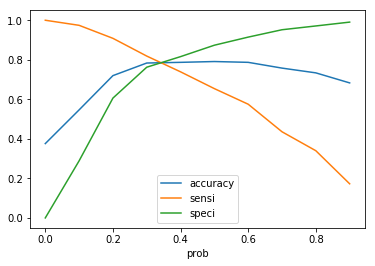

In [294]:
#Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.33 is the optimum point to take it as a cutoff probability.

In [295]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.669137,7220,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.623387,3383,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.548224,770,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.977168,5785,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.381306,5252,0,1,1,1,1,0,0,0,0,0,0,1


In [296]:
#Checking the overall accuracy with new probability cutoff.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7894823066841415

In [297]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[2980,  829],
       [ 456, 1839]], dtype=int64)

In [298]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [299]:
#Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8013071895424837

In [300]:
#Calculating specificity
TN / float(TN+FP)

0.7823575741664479

In [301]:
# Calculating false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.21764242583355212


In [302]:
#Calculating positive predictive value 
print (TP / float(TP+FP))

0.68928035982009


In [303]:
#Calculating Negative predictive value
print (TN / float(TN+ FN))

0.8672875436554133


#### Precision and Recall

In [304]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3328,  481],
       [ 794, 1501]], dtype=int64)

In [305]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7573158425832492

In [306]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6540305010893246

In [307]:
from sklearn.metrics import precision_score, recall_score

In [308]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7573158425832492

In [309]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6540305010893246

## Precision and recall tradeoff

In [310]:
from sklearn.metrics import precision_recall_curve

In [311]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       1
 4       1
 5       0
 6       0
 7       0
 8       0
 9       1
 10      0
 11      0
 12      0
 13      1
 14      1
 15      0
 16      0
 17      1
 18      1
 19      1
 20      1
 21      0
 22      0
 23      0
 24      1
 25      1
 26      0
 27      0
 28      0
 29      0
        ..
 6074    1
 6075    0
 6076    0
 6077    1
 6078    1
 6079    0
 6080    1
 6081    0
 6082    0
 6083    0
 6084    1
 6085    0
 6086    1
 6087    0
 6088    1
 6089    1
 6090    1
 6091    0
 6092    1
 6093    1
 6094    1
 6095    0
 6096    0
 6097    1
 6098    0
 6099    0
 6100    0
 6101    0
 6102    0
 6103    1
 Name: Converted, Length: 6104, dtype: int64, 0       1
 1       1
 2       1
 3       1
 4       0
 5       0
 6       0
 7       1
 8       0
 9       1
 10      1
 11      1
 12      0
 13      1
 14      1
 15      0
 16      0
 17      1
 18      1
 19      0
 20      1
 21      0
 22      0
 23      0
 24      0
 25      

In [312]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

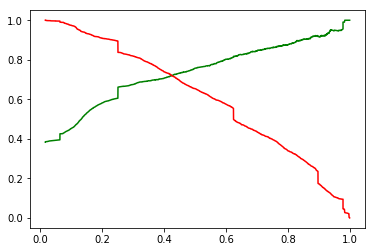

In [313]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

In [314]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.669137,7220,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.623387,3383,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.548224,770,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.977168,5785,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.381306,5252,0,1,1,1,1,0,0,0,0,0,0,0


In [315]:
#Checking the overall accuracy with new probability cutoff.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.7899737876802096

In [316]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3154,  655],
       [ 627, 1668]], dtype=int64)

In [317]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [318]:
#Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.726797385620915

In [319]:
#Calculating specificity
TN / float(TN+FP)

0.8280388553426096

In [320]:
# Calculating false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.1719611446573904


In [321]:
#Calculating positive predictive value 
print (TP / float(TP+FP))

0.7180370210934137


In [322]:
#Calculating Negative predictive value
print (TN / float(TN+ FN))

0.8341708542713567


## 11. Making predictions on the test set

In [323]:
#Dividing leads test data set into x and y sets for the predictions
y_test = leads_test['Converted']
X_test = leads_test.drop(['Converted','Prospect ID'], 1)

In [324]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2617 entries, 1105 to 4752
Data columns (total 66 columns):
Do Not Email                                          2617 non-null int64
Do Not Call                                           2617 non-null int64
TotalVisits                                           2617 non-null float64
Total Time Spent on Website                           2617 non-null int64
Page Views Per Visit                                  2617 non-null float64
Search                                                2617 non-null int64
Newspaper Article                                     2617 non-null int64
X Education Forums                                    2617 non-null int64
Newspaper                                             2617 non-null int64
Digital Advertisement                                 2617 non-null int64
Through Recommendations                               2617 non-null int64
A free copy of Mastering The Interview                2617 non-null int6

In [325]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [326]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Through Recommendations,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Bounced,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
1105,-0.602901,0,0,1,0,0,0,0,0,0,0,0,0,0
5872,-0.876452,0,0,0,0,0,0,1,0,0,0,0,1,0
480,-0.876452,0,0,0,0,0,0,0,0,0,0,0,0,0
8055,-0.876452,0,0,0,0,1,0,0,0,0,0,0,1,0
8214,-0.876452,0,0,0,0,0,0,0,0,0,0,0,0,0


In [327]:
X_test_sm = sm.add_constant(X_test)

In [328]:
y_test_pred = res.predict(X_test_sm)

In [329]:
y_test_pred[:10]

1105    0.142340
5872    0.996235
480     0.251155
8055    0.977168
8214    0.251155
4641    0.111256
5693    0.251155
3810    0.695856
430     0.165111
2085    0.981649
dtype: float64

In [330]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [331]:
# Checking the head
y_pred_1.head()

,0
1105,0.142340
5872,0.996235
480,0.251155
8055,0.977168
8214,0.251155


In [332]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [333]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [334]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [335]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [336]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [337]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,1105,0.142340
1,1,5872,0.996235
2,0,480,0.251155
3,1,8055,0.977168
4,0,8214,0.251155


In [338]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [339]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Conversion_Prob'], axis=1)

In [340]:
# Checking the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob
0,1105,0,0.142340
1,5872,1,0.996235
2,480,0,0.251155
3,8055,1,0.977168
4,8214,0,0.251155


In [341]:
#0.42 as cut off probability(from precision and recall curve) is giving better results compared to 
#0.33 (from accurcay,specificity and sensitivity curve)
#So using 0.42 as the cut offf probability for making prediction
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [342]:
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Final_Predicted
0,1105,0,0.142340,0
1,5872,1,0.996235,1
2,480,0,0.251155,0
3,8055,1,0.977168,1
4,8214,0,0.251155,0


In [343]:
#Checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8028276652655713

In [344]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion2

array([[1363,  279],
       [ 237,  738]], dtype=int64)

In [345]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [346]:
#Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7569230769230769

In [347]:
#Checking the specificity
TN / float(TN+FP)

0.8300852618757613

In [348]:
# Calculating false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.16991473812423874


In [349]:
#Calculating positive predictive value 
print (TP / float(TP+FP))

0.7256637168141593


In [350]:
#Calculating Negative predictive value
print (TN / float(TN+ FN))

0.851875


## 12.Calculating lead scores for the original data set

In [351]:
# Checking the column-wise null percentages here

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                           0.0
Do Not Email                                          0.0
Do Not Call                                           0.0
Converted                                             0.0
TotalVisits                                           0.0
Total Time Spent on Website                           0.0
Page Views Per Visit                                  0.0
Search                                                0.0
Newspaper Article                                     0.0
X Education Forums                                    0.0
Newspaper                                             0.0
Digital Advertisement                                 0.0
Through Recommendations                               0.0
A free copy of Mastering The Interview                0.0
Lead Origin_Landing Page Submission                   0.0
Lead Origin_Lead Add Form                             0.0
Lead Origin_Lead Import                               0.0
Lead Source_Di

In [352]:
#Dividing leads test data set into x and y sets for the predictions
y = leads['Converted']
X = leads.drop(['Converted','Prospect ID'], 1)

In [353]:
#Checking the information of X
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 66 columns):
Do Not Email                                          9074 non-null int64
Do Not Call                                           9074 non-null int64
TotalVisits                                           9074 non-null float64
Total Time Spent on Website                           9074 non-null int64
Page Views Per Visit                                  9074 non-null float64
Search                                                9074 non-null int64
Newspaper Article                                     9074 non-null int64
X Education Forums                                    9074 non-null int64
Newspaper                                             9074 non-null int64
Digital Advertisement                                 9074 non-null int64
Through Recommendations                               9074 non-null int64
A free copy of Mastering The Interview                9074 non-null int64
L

In [354]:
#Applying the standard scaler on original data set
X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [355]:
X = X[col]
X.head()

,Total Time Spent on Website,Through Recommendations,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Bounced,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
0,-0.876452,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.369311,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.955163,0,1,0,0,0,0,0,0,0,0,0,0,0
3,-0.312716,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1.762938,0,0,1,0,0,0,0,0,0,0,0,0,0


In [356]:
X_sm = sm.add_constant(X)

In [357]:
y_pred = res.predict(X_sm)

In [358]:
y_pred[:10]

0    0.251155
1    0.280197
2    0.635334
3    0.128159
4    0.686393
5    0.064192
6    0.770389
7    0.064192
8    0.084026
9    0.121602
dtype: float64

In [359]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_pred)

In [360]:
# Checking the head
y_pred_1.head()

,0
0,0.251155
1,0.280197
2,0.635334
3,0.128159
4,0.686393


In [361]:
# Converting y to dataframe
y_df = pd.DataFrame(y)

In [362]:
#Mapping the Prospect ID of the leads data set to y_df
y_df['Prospect ID'] = leads['Prospect ID']

In [363]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [364]:
# Appending y_df and y_pred_1
y_pred_final = pd.concat([y_df, y_pred_1],axis=1)

In [365]:
# Appending y_df and y_pred_1
y_pred_final = pd.concat([y_df, y_pred_1],axis=1)

In [366]:
#Checking the head
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0.251155
1,0,2a272436-5132-4136-86fa-dcc88c88f482,0.280197
2,1,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0.635334
3,0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0.128159
4,1,3256f628-e534-4826-9d63-4a8b88782852,0.686393


In [367]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [368]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Conversion_Prob'], axis=1)

In [369]:
# Checking the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.251155
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0.280197
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,0.635334
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0.128159
4,3256f628-e534-4826-9d63-4a8b88782852,1,0.686393


In [370]:
#Using 0.42 as cut off probability for making prediction as it is giving better results 
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.32 else 0)

In [371]:
#Checking the head
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Final_Predicted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.251155,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0.280197,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,0.635334,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0.128159,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,0.686393,1


In [372]:
#Concatenating the X and y_pred_final and storing it in leads
leads = pd.concat([y_pred_final,X],axis=1)

In [373]:
#Checking the head
leads.tail()

,Prospect ID,Converted,Conversion_Prob,Final_Predicted,Total Time Spent on Website,Through Recommendations,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Bounced,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
9235,NaN,NaN,NaN,NaN,2.533684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9236,NaN,NaN,NaN,NaN,-0.436553,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9237,NaN,NaN,NaN,NaN,-0.508637,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9238,NaN,NaN,NaN,NaN,0.045856,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9239,NaN,NaN,NaN,NaN,1.487540,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [374]:
#Checking the information of leads data set
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9238 entries, 0 to 9239
Data columns (total 18 columns):
Prospect ID                               9074 non-null object
Converted                                 9074 non-null float64
Conversion_Prob                           9074 non-null float64
Final_Predicted                           9074 non-null float64
Total Time Spent on Website               9074 non-null float64
Through Recommendations                   9074 non-null float64
Lead Source_Direct Traffic                9074 non-null float64
Lead Source_Google                        9074 non-null float64
Lead Source_Organic Search                9074 non-null float64
Lead Source_Reference                     9074 non-null float64
Lead Source_Referral Sites                9074 non-null float64
Lead Source_Welingak Website              9074 non-null float64
Last Activity_Email Bounced               9074 non-null float64
Last Activity_Had a Phone Conversation    9074 non-null float6

In [375]:
# Checking the column-wise null percentages here

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                               1.78
Converted                                 1.78
Conversion_Prob                           1.78
Final_Predicted                           1.78
Total Time Spent on Website               1.78
Through Recommendations                   1.78
Lead Source_Direct Traffic                1.78
Lead Source_Google                        1.78
Lead Source_Organic Search                1.78
Lead Source_Reference                     1.78
Lead Source_Referral Sites                1.78
Lead Source_Welingak Website              1.78
Last Activity_Email Bounced               1.78
Last Activity_Had a Phone Conversation    1.78
Last Activity_Olark Chat Conversation     1.78
Last Notable Activity_Email Bounced       1.78
Last Notable Activity_SMS Sent            1.78
Last Notable Activity_Unreachable         1.78
dtype: float64

In [376]:
len(leads[leads['Prospect ID'].isnull()==False])

9074

In [377]:
leads.sort_values('Conversion_Prob',ascending=True,inplace = True, na_position ='last')

In [378]:
#Checking the information of leads data set
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9238 entries, 3948 to 9239
Data columns (total 18 columns):
Prospect ID                               9074 non-null object
Converted                                 9074 non-null float64
Conversion_Prob                           9074 non-null float64
Final_Predicted                           9074 non-null float64
Total Time Spent on Website               9074 non-null float64
Through Recommendations                   9074 non-null float64
Lead Source_Direct Traffic                9074 non-null float64
Lead Source_Google                        9074 non-null float64
Lead Source_Organic Search                9074 non-null float64
Lead Source_Reference                     9074 non-null float64
Lead Source_Referral Sites                9074 non-null float64
Lead Source_Welingak Website              9074 non-null float64
Last Activity_Email Bounced               9074 non-null float64
Last Activity_Had a Phone Conversation    9074 non-null flo

In [379]:
# Checking the column-wise null percentages here

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                               1.78
Converted                                 1.78
Conversion_Prob                           1.78
Final_Predicted                           1.78
Total Time Spent on Website               1.78
Through Recommendations                   1.78
Lead Source_Direct Traffic                1.78
Lead Source_Google                        1.78
Lead Source_Organic Search                1.78
Lead Source_Reference                     1.78
Lead Source_Referral Sites                1.78
Lead Source_Welingak Website              1.78
Last Activity_Email Bounced               1.78
Last Activity_Had a Phone Conversation    1.78
Last Activity_Olark Chat Conversation     1.78
Last Notable Activity_Email Bounced       1.78
Last Notable Activity_SMS Sent            1.78
Last Notable Activity_Unreachable         1.78
dtype: float64

In [380]:
#Deleting the rows with no prospect ids
leads.dropna(axis=0, how ='any',inplace=True)

In [381]:
# Checking the column-wise null percentages here

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                               0.0
Converted                                 0.0
Conversion_Prob                           0.0
Final_Predicted                           0.0
Total Time Spent on Website               0.0
Through Recommendations                   0.0
Lead Source_Direct Traffic                0.0
Lead Source_Google                        0.0
Lead Source_Organic Search                0.0
Lead Source_Reference                     0.0
Lead Source_Referral Sites                0.0
Lead Source_Welingak Website              0.0
Last Activity_Email Bounced               0.0
Last Activity_Had a Phone Conversation    0.0
Last Activity_Olark Chat Conversation     0.0
Last Notable Activity_Email Bounced       0.0
Last Notable Activity_SMS Sent            0.0
Last Notable Activity_Unreachable         0.0
dtype: float64

In [382]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8910 entries, 3948 to 7078
Data columns (total 18 columns):
Prospect ID                               8910 non-null object
Converted                                 8910 non-null float64
Conversion_Prob                           8910 non-null float64
Final_Predicted                           8910 non-null float64
Total Time Spent on Website               8910 non-null float64
Through Recommendations                   8910 non-null float64
Lead Source_Direct Traffic                8910 non-null float64
Lead Source_Google                        8910 non-null float64
Lead Source_Organic Search                8910 non-null float64
Lead Source_Reference                     8910 non-null float64
Lead Source_Referral Sites                8910 non-null float64
Lead Source_Welingak Website              8910 non-null float64
Last Activity_Email Bounced               8910 non-null float64
Last Activity_Had a Phone Conversation    8910 non-null flo

In [383]:
import math

#Creating Score column in the leads data set and assigning Score to each prospect id based on the conversion probability
leads['Score']=0
div=math.floor((len(leads)/100))
for i in range (0,math.ceil(len(leads)/div)):
    leads['Score'].iloc[i*div:(i+1)*div]=i
    i=i+1

In [384]:
#Checking the head
leads[['Prospect ID','Conversion_Prob','Score']].head()

,Prospect ID,Conversion_Prob,Score
3948,889c23c8-84d0-4936-97ad-7b438dc2e2d7,0.004121,0
6397,964e5103-abbc-4324-b856-891049533775,0.004247,0
5361,b660cdb2-57a8-4c3a-8371-8f7520330502,0.004256,0
6493,60f52b48-f04d-47f4-82c7-24d3bb0848eb,0.004412,0
6213,5198fa3f-201c-429d-9756-c21539ab6c7a,0.004529,0


In [385]:
#Checking the tail
leads[['Prospect ID','Conversion_Prob','Score']].tail()

,Prospect ID,Conversion_Prob,Score
2523,597169d6-a4bb-4efb-807b-17b0fd928492,0.997897,100
7960,bf4a03bc-b747-45a6-a6b5-659afa3bf3ac,0.998441,100
6118,d34b684a-7d92-4f13-abfb-8a507ce0351c,0.998602,100
1950,d41b76fd-e215-463c-a9be-6dcfc2440e90,0.998721,100
7078,ed62264f-7666-4bf9-9cb6-5b9a825f1e67,0.999637,100


In [386]:
#Checking the lead score to achieve 80% conversion rate
leads_80=leads.loc[leads['Score']>=73]
conversion_rate = (sum(leads_80['Converted'])/len(leads_80['Converted'].index))*100
conversion_rate

80.10774968918359

#### From the above analysis we can conclude that to achieve 80% conversion rate the sales team of X Education company has to focus on the leads with score greater than equal to 73